# Review

## Pandas
Nah, kita kembali lagi ke modul di Python bernama pandas, di mana pandas ini digunakan untuk kita yang mau berurusan dengan data, terutama data frame. Di dalam Pandas ini terdapat banyak sekali metode yang bisa digunakan. Pertama, tentunya adalah data assessing data, yaitu melihat apa saja yang ada di dalam data tersebut, informasi apa saja yang terkandung di dalam data tersebut, kayak informasi dasar. Kemudian, kalian juga bisa melakukan pre-processing di situ, mengatasi missing value, kemudian mentransformasi variable, dan sebagainya. Kemudian, kalian juga bisa melakukan simple data analysis dengan menggunakan Pandas, contohnya seperti mengeluarkan statistika deskriptif, dan juga korelasi, dan masih banyak lagi lainnya sebetulnya.


In [3]:
# import pandas as pd
import pandas as pd
import numpy as np

#### Pembuatan Dataframe

In [3]:
# membuat dataframe dummy
pd.DataFrame(
    {"a" : [4, 5, 6], 
     "b" : [7, 8, 9], 
     "c" : [10, 11, 12]}, 
index = [1, 2, 3]
)

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [4]:
pd.DataFrame(
    [[4, 7, 10],
     [5, 8, 11],
     [6, 9, 12]], 
    index=[1, 2, 3], 
    columns=['a', 'b', 'c']
)

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [8]:
# Contoh data dummy (tinggal run saja)
np.random.seed(0)

# Dummy data parameters
num_samples = 100

# Generate random data
names = [f"Name_{i}" for i in range(num_samples)]
ages = np.random.randint(18, 65, size=num_samples)
genders = np.random.choice(['Male', 'Female'], size=num_samples)
salaries = np.random.randint(30000, 120000, size=num_samples)
departments = np.random.choice(['HR', 'IT', 'Finance', 'Marketing', 'Sales'], size=num_samples)
random_objects = np.random.randint(1,1000, size=num_samples)

df = pd.DataFrame({
    'Name': names,
    'Age': ages,
    'Gender': genders,
    'Salary': salaries,
    'Department': departments,
    "unused_column": random_objects
})

In [15]:
df.to_csv("dataframe.csv")

In [4]:
# Membaca Data
df = pd.read_csv("dataframe.csv")

#### Informasi dasar

In [17]:
df.shape #Mengembalikan shape
df.index # Mengembalikan index
df.columns # Mengembalikan nama2 column
df.info() # Informasi data
df.count() # Mengembalikan jumlah non-NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     100 non-null    int64 
 1   Name           100 non-null    object
 2   Age            100 non-null    int64 
 3   Gender         100 non-null    object
 4   Salary         100 non-null    int64 
 5   Department     100 non-null    object
 6   unused_column  100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


Unnamed: 0       100
Name             100
Age              100
Gender           100
Salary           100
Department       100
unused_column    100
dtype: int64

In [26]:

df.sum() # Jumlah per column
df.cumsum() # jumlah kumulatif
df.min()/df.max() # max dan min setiap column
df.describe() # statdes setiap column
df.mean()# mean setiap column
df.median()# median setiap column

# Perhatikan bahwa terdapat beberapa yang error, gunakan only_numeric = True

In [22]:
df.isnull().sum() # Jumlah missing value per column
df.duplicated().sum() # Jumlah data duplikat
df.nunique() # Jumlah nilai unique

,Unnamed: 0,Name,Age,Gender,Salary,Department,unused_column
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False


In [ ]:
df.select_dtypes(include=['number']).columns # untuk mengambil nama column bertipe angka
df.select_dtypes(include=['object']).columns # untuk mengambil nama column bertipe object

In [ ]:
# Melihat subset data
df.head()
df.tail()
df.sample(10)

#### Preprocessing

In [ ]:
# Missing value
df.dropna() # drop row dengan nilai missing
df.fillna(value) # nilai NA diganti value
df.drop_duplicates() #drop duplikat

In [ ]:
# Mengambil kolom
df[["Name", "Age", "Gender"]]
df["Age"]

In [11]:
# Menghapus column
df.drop(["unused_column"], axis=1)

,Name,Age,Gender,Salary,Department
0,Name_0,62,Male,72512,Sales
1,Name_1,18,Male,49608,Marketing
2,Name_2,21,Female,100557,Finance
3,Name_3,21,Male,47340,IT
4,Name_4,57,Male,31913,IT
...,...,...,...,...,...
95,Name_95,59,Female,36004,Finance
96,Name_96,53,Female,65620,IT
97,Name_97,18,Female,72521,Finance
98,Name_98,49,Female,116339,IT


In [13]:
# menghapus row
df.drop([99], axis=0)

,Name,Age,Gender,Salary,Department,unused_column
0,Name_0,62,Male,72512,Sales,782
1,Name_1,18,Male,49608,Marketing,890
2,Name_2,21,Female,100557,Finance,839
3,Name_3,21,Male,47340,IT,551
4,Name_4,57,Male,31913,IT,680
...,...,...,...,...,...,...
94,Name_94,23,Male,112088,Marketing,909
95,Name_95,59,Female,36004,Finance,229
96,Name_96,53,Female,65620,IT,827
97,Name_97,18,Female,72521,Finance,898


In [14]:
# sort
df.sort_values(by="unused_column", ascending=True)

,Name,Age,Gender,Salary,Department,unused_column
28,Name_28,23,Male,45741,Marketing,5
49,Name_49,52,Female,45997,HR,8
6,Name_6,37,Male,43429,IT,14
41,Name_41,27,Female,60752,HR,30
23,Name_23,31,Female,45115,Finance,57
...,...,...,...,...,...,...
46,Name_46,53,Male,76774,HR,948
20,Name_20,35,Female,45912,IT,963
67,Name_67,56,Female,119987,HR,977
12,Name_12,42,Male,90155,Marketing,986


In [27]:
# membuat kolom baru
df["new_column"] = df["unused_column"]/5
df

,Unnamed: 0,Name,Age,Gender,Salary,Department,unused_column,new_column
0,0,Name_0,62,Male,72512,Sales,782,156.4
1,1,Name_1,18,Male,49608,Marketing,890,178.0
2,2,Name_2,21,Female,100557,Finance,839,167.8
3,3,Name_3,21,Male,47340,IT,551,110.2
4,4,Name_4,57,Male,31913,IT,680,136.0
...,...,...,...,...,...,...,...,...
95,95,Name_95,59,Female,36004,Finance,229,45.8
96,96,Name_96,53,Female,65620,IT,827,165.4
97,97,Name_97,18,Female,72521,Finance,898,179.6
98,98,Name_98,49,Female,116339,IT,370,74.0


In [29]:
# Menggabungkan 2 data secara vertikal
df_gabungan = pd.concat([df, df], axis=0)
df_gabungan

,Unnamed: 0,Name,Age,Gender,Salary,Department,unused_column,new_column
0,0,Name_0,62,Male,72512,Sales,782,156.4
1,1,Name_1,18,Male,49608,Marketing,890,178.0
2,2,Name_2,21,Female,100557,Finance,839,167.8
3,3,Name_3,21,Male,47340,IT,551,110.2
4,4,Name_4,57,Male,31913,IT,680,136.0
...,...,...,...,...,...,...,...,...
95,95,Name_95,59,Female,36004,Finance,229,45.8
96,96,Name_96,53,Female,65620,IT,827,165.4
97,97,Name_97,18,Female,72521,Finance,898,179.6
98,98,Name_98,49,Female,116339,IT,370,74.0


In [30]:
# Menggabungkan 2 data secara horizontal
df_gabungan = pd.concat([df, df], axis=1)
df_gabungan

,Unnamed: 0,Name,Age,Gender,Salary,Department,unused_column,new_column,Unnamed: 0,Name,Age,Gender,Salary,Department,unused_column,new_column
0,0,Name_0,62,Male,72512,Sales,782,156.4,0,Name_0,62,Male,72512,Sales,782,156.4
1,1,Name_1,18,Male,49608,Marketing,890,178.0,1,Name_1,18,Male,49608,Marketing,890,178.0
2,2,Name_2,21,Female,100557,Finance,839,167.8,2,Name_2,21,Female,100557,Finance,839,167.8
3,3,Name_3,21,Male,47340,IT,551,110.2,3,Name_3,21,Male,47340,IT,551,110.2
4,4,Name_4,57,Male,31913,IT,680,136.0,4,Name_4,57,Male,31913,IT,680,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Name_95,59,Female,36004,Finance,229,45.8,95,Name_95,59,Female,36004,Finance,229,45.8
96,96,Name_96,53,Female,65620,IT,827,165.4,96,Name_96,53,Female,65620,IT,827,165.4
97,97,Name_97,18,Female,72521,Finance,898,179.6,97,Name_97,18,Female,72521,Finance,898,179.6
98,98,Name_98,49,Female,116339,IT,370,74.0,98,Name_98,49,Female,116339,IT,370,74.0


#### Analisis

In [32]:
# Korelasi
df.corr(numeric_only=True)

,Unnamed: 0,Age,Salary,unused_column,new_column
Unnamed: 0,1.000000,-0.001579,0.301397,-0.068290,-0.068290
Age,-0.001579,1.000000,-0.146075,0.019622,0.019622
Salary,0.301397,-0.146075,1.000000,0.126992,0.126992
unused_column,-0.068290,0.019622,0.126992,1.000000,1.000000
new_column,-0.068290,0.019622,0.126992,1.000000,1.000000


In [33]:
df.corr(numeric_only=True)["Age"]

Unnamed: 0      -0.001579
Age              1.000000
Salary          -0.146075
unused_column    0.019622
new_column       0.019622
Name: Age, dtype: float64

In [42]:
# Group By dan aggregat
df.groupby(["Department"]).agg({"Salary" : "mean", "Age":"median", "new_column":"var"})

,Salary,Age,new_column
Department,,,
Finance,76848.090909,31.5,3109.968139
HR,80400.312500,39.5,4721.236667
IT,67578.333333,40.0,2496.824575
Marketing,78546.391304,41.0,3321.103399
Sales,78163.238095,39.0,3458.060000


In [43]:
df.groupby(["Department"]).agg({"Salary" : {"mean", "var", "median"}, "Age":{"mean", "var", "median"}})


Salary                               Age                   
                    mean           var   median       mean         var median
Department                                                                   
Finance     76848.090909  5.702461e+08  75344.5  34.681818  188.798701   31.5
HR          80400.312500  8.436544e+08  83187.5  40.250000  197.133333   39.5
IT          67578.333333  7.657044e+08  62881.0  39.944444  167.584967   40.0
Marketing   78546.391304  6.591327e+08  73349.0  38.913043  201.446640   41.0
Sales       78163.238095  8.758756e+08  77805.0  40.904762  219.190476   39.0

**Referensi:**
1. [Pandas Cheatsheet Official](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
2. [Pandas Cheatsheet Datacamp](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)


## Matplotlib


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membuat figure
plt.figure(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

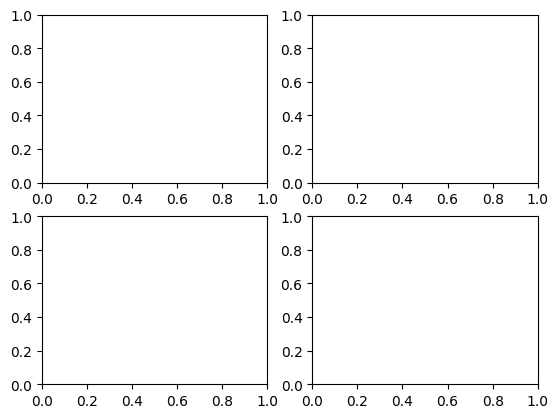

In [3]:
# Membuat subplot
plt.subplots(2,2)

In [4]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


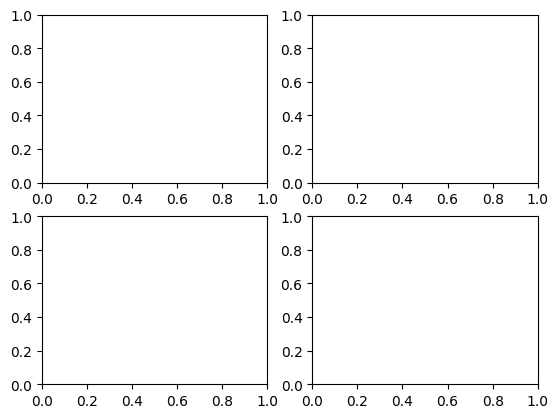

In [5]:
fig, ax = plt.subplots(2,2)

In [6]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [7]:
ax[0,0].hist(df["total_bill"])
ax[0,0].set_title("Histogram")

Text(0.5, 1.0, 'Histogram')

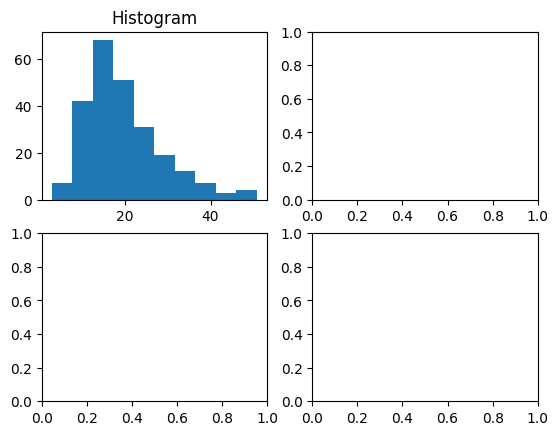

In [8]:
fig

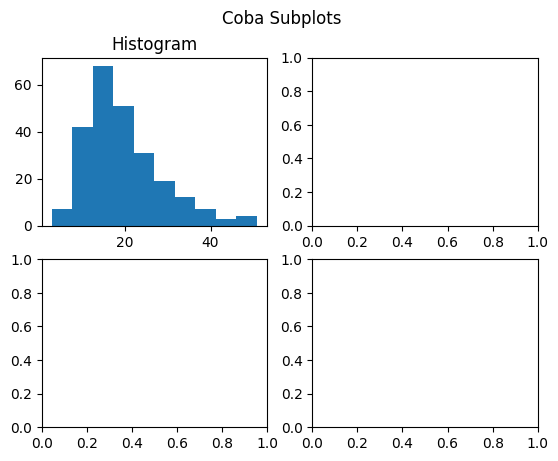

In [9]:
fig.suptitle('Coba Subplots')
fig

In [10]:
ax[0,1].hist(df[df["sex"]=="Male"]["total_bill"], color="red")
ax[0,1].set_title("Histogram")

Text(0.5, 1.0, 'Histogram')

In [11]:
ax[0,1].hist(df[df["sex"]=="Female"]["total_bill"], color="green")
ax[0,1].set_title("Histogram for Gender")

Text(0.5, 1.0, 'Histogram for Gender')

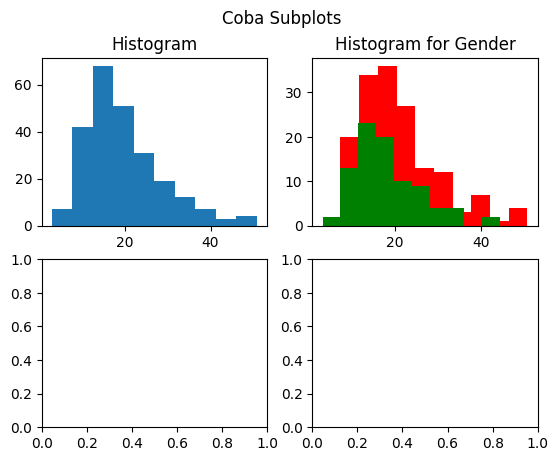

In [12]:
fig

In [13]:
ax[1,0].scatter(df["total_bill"], df["tip"])
ax[1,0].set_title("Scatter Plot")

Text(0.5, 1.0, 'Scatter Plot')

In [19]:
ax[1,1].scatter(df[df["sex"]=="Male"]["total_bill"], df[df["sex"]=="Male"]["tip"], color="black")
ax[1,1].scatter(df[df["sex"]=="Female"]["total_bill"], df[df["sex"]=="Female"]["tip"], color="pink")
ax[1,1].set_title("Scatter Plot for Gender")

Text(0.5, 1.0, 'Scatter Plot for Gender')

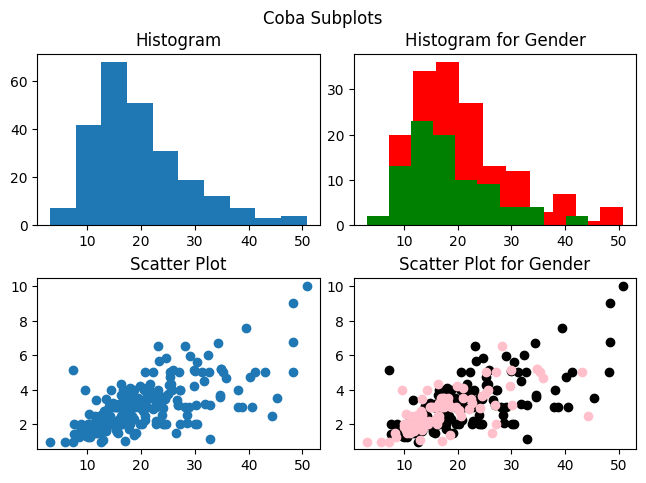

In [20]:
fig.tight_layout(pad=0.5)
fig

Text(0.5, 1.0, 'Scatter Plot')

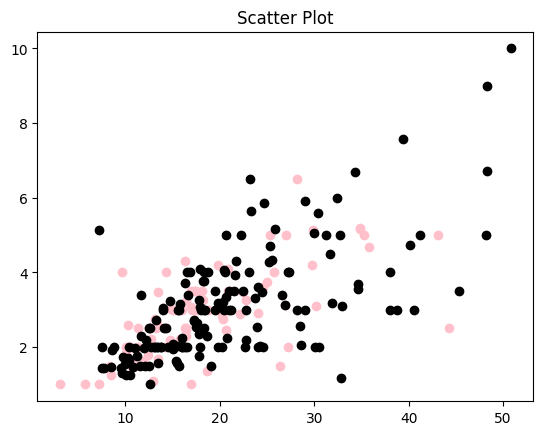

In [18]:

plt.scatter(df[df["sex"]=="Female"]["total_bill"], df[df["sex"]=="Female"]["tip"], color="pink")
plt.scatter(df[df["sex"]=="Male"]["total_bill"], df[df["sex"]=="Male"]["tip"], color="black")
plt.title("Scatter Plot")

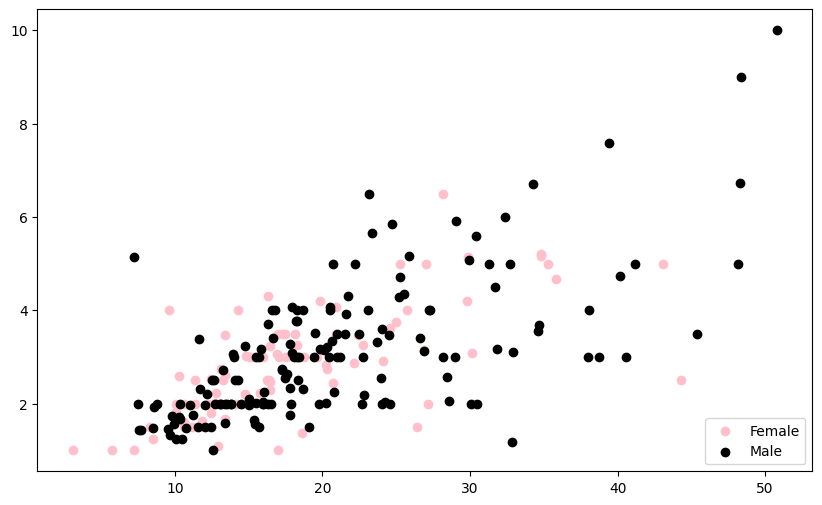

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(df[df["sex"]=="Female"]["total_bill"], df[df["sex"]=="Female"]["tip"], color="pink", label="Female")
plt.scatter(df[df["sex"]=="Male"]["total_bill"], df[df["sex"]=="Male"]["tip"], color="black", label="Male")
plt.legend(loc="lower right")
plt.show()

**Referensi:**
1. [Tolong Dibaca!](https://matplotlib.org/cheatsheets/cheatsheets.pdf)
2. [Referensi lainnya](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

## Seaborn
**Tolong dibuka referensi berikut:** [Link to Kaggle](https://www.kaggle.com/code/themlphdstudent/cheat-sheet-seaborn-charts)